**Data preparation, Exploratory Data Analysis (EDA), and visualization** form the foundational steps of any data analysis project.

1. Data preparation involves cleaning raw data by handling missing values, removing duplicates, standardizing formats, and transforming variables into suitable forms for analysis.

2. EDA follows this by using statistical methods and exploratory techniques to understand the underlying patterns, relationships, and anomalies in the dataset - this includes checking distributions, correlations, and summary statistics.

3. Finally, visualization takes the insights discovered during EDA and presents them in compelling visual formats (like charts, graphs, and dashboards) to effectively communicate findings to stakeholders and support data-driven decision making.

These three components typically form a cyclical process, where insights from visualizations might prompt further data preparation or exploration.

**Time series analysis** is a statistical method that involves studying data points collected sequentially over time, allowing analysts to identify patterns, trends, and seasonality within the data to make predictions about future values based on historical observations, essentially analyzing how a variable changes over a period by recording data at consistent intervals.

Key points about time series analysis:
1. Data collection: Data points are recorded at regular intervals, not randomly, to capture the temporal relationships between observations.
2. Pattern identification: The analysis seeks to identify recurring patterns, trends, and seasonal variations within the data.
3. Forecasting: A primary application of time series analysis is to predict future values based on the observed patterns in the data.
4. Applications: This technique is widely used in fields like finance (stock prices), economics (GDP), weather forecasting, sales analysis, and website traffic monitoring.

STEP 1: Dataset collection from kaggle

Step 1.1: Set Up Kaggle API in Colab

In [45]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [46]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Step 1.2: Install Kaggle API in Colab

In [47]:
!pip install kaggle


Step 1.3: Download the Bitcoin Historical Data Dataset

In [2]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data


Dataset URL: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data
License(s): CC-BY-SA-4.0
 91% 81.0M/89.1M [00:00<00:00, 113MB/s] 
100% 89.1M/89.1M [00:00<00:00, 118MB/s]


In [3]:
!unzip bitcoin-historical-data.zip


Archive:  bitcoin-historical-data.zip
  inflating: btcusd_1-min_data.csv   


Step 1.4: Load the Dataset for Initial Inspection

In [6]:
import pandas as pd
data = pd.read_csv('/content/btcusd_1-min_data.csv')  # Replace with the exact filename if different
print(data.head())


         Timestamp  Open  High  Low  Close  Volume
0 1,325,412,060.00  4.58  4.58 4.58   4.58    0.00
1 1,325,412,120.00  4.58  4.58 4.58   4.58    0.00
2 1,325,412,180.00  4.58  4.58 4.58   4.58    0.00
3 1,325,412,240.00  4.58  4.58 4.58   4.58    0.00
4 1,325,412,300.00  4.58  4.58 4.58   4.58    0.00


Step 2: Initial Data Exploration

Step 2.1: Inspect Data Structure

In [49]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/btcusd_1-min_data.csv')
print(data.info())  # Check data types and non-null counts
print(data.head())  # Display the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6708281 entries, 0 to 6708280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 307.1 MB
None
      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0


In [26]:
print(data.describe())


          Timestamp          Open          High           Low         Close  \
count  6.708280e+06  6.708281e+06  6.708281e+06  6.708281e+06  6.708281e+06   
mean   1.526688e+09  1.421575e+04  1.422191e+04  1.420939e+04  1.421577e+04   
std    1.162139e+08  1.902724e+04  1.903466e+04  1.901970e+04  1.902733e+04   
min    1.325412e+09  3.800000e+00  3.800000e+00  3.800000e+00  3.800000e+00   
25%    1.426047e+09  4.109900e+02  4.111000e+02  4.109000e+02  4.109900e+02   
50%    1.526682e+09  6.199830e+03  6.201420e+03  6.197130e+03  6.199800e+03   
75%    1.627317e+09  2.289000e+04  2.289786e+04  2.288300e+04  2.289000e+04   
max    1.730678e+09  7.379300e+04  7.379400e+04  7.373900e+04  7.379400e+04   

             Volume  
count  6.708281e+06  
mean   5.478574e+00  
std    2.298565e+01  
min    0.000000e+00  
25%    1.814250e-02  
50%    5.000000e-01  
75%    3.189775e+00  
max    5.853852e+03  


In [50]:
print(data.isnull().sum())


Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


Step 3: Data Preprocessing


In [51]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [52]:
data.set_index('Timestamp', inplace=True)


Step 4: Data Visualization


Plot the Bitcoin Price Over Time:

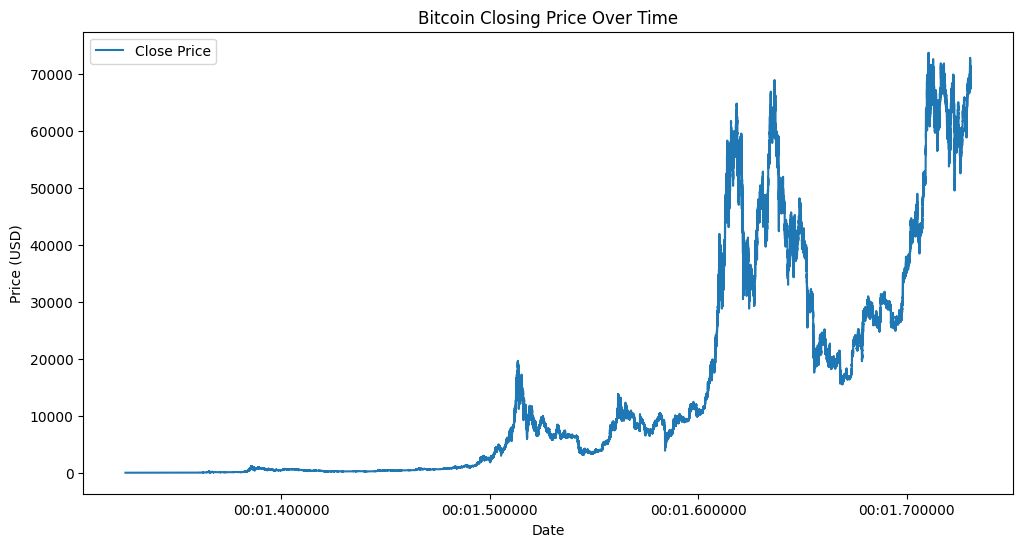

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Plot Daily Returns:

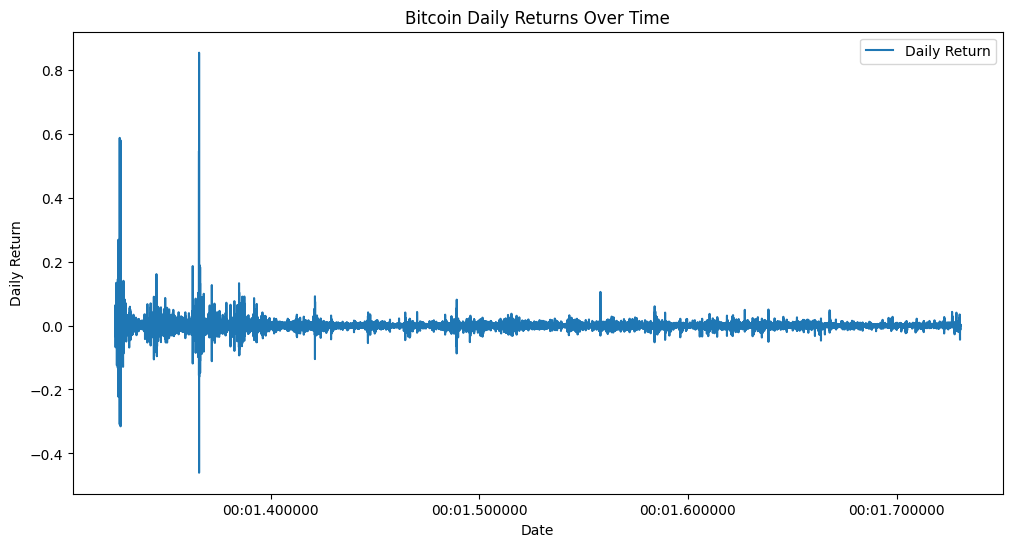

In [54]:
data['Daily Return'] = data['Close'].pct_change()  # Calculate percentage daily returns

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily Return'], label='Daily Return')
plt.title('Bitcoin Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


Distribution of Daily Returns:

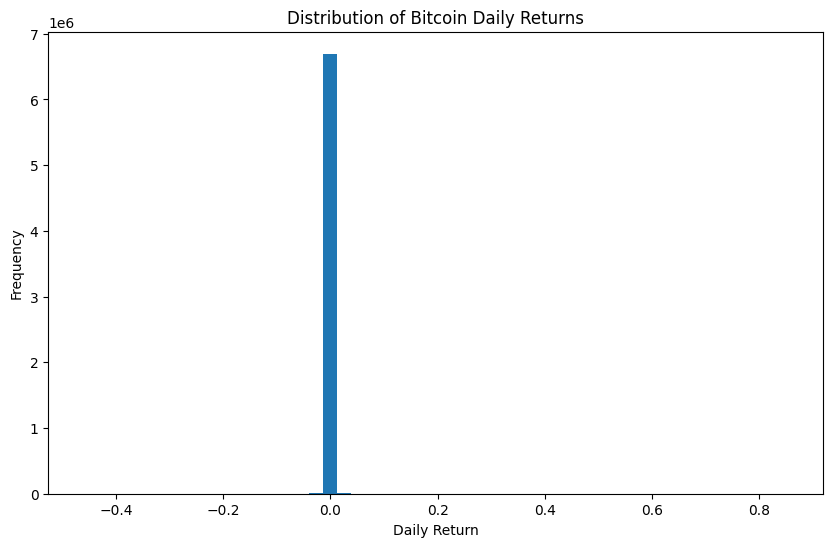

In [55]:
data['Daily Return'].plot(kind='hist', bins=50, figsize=(10, 6), title='Distribution of Bitcoin Daily Returns')
plt.xlabel('Daily Return')
plt.show()


Rolling Average and Moving Volatility:

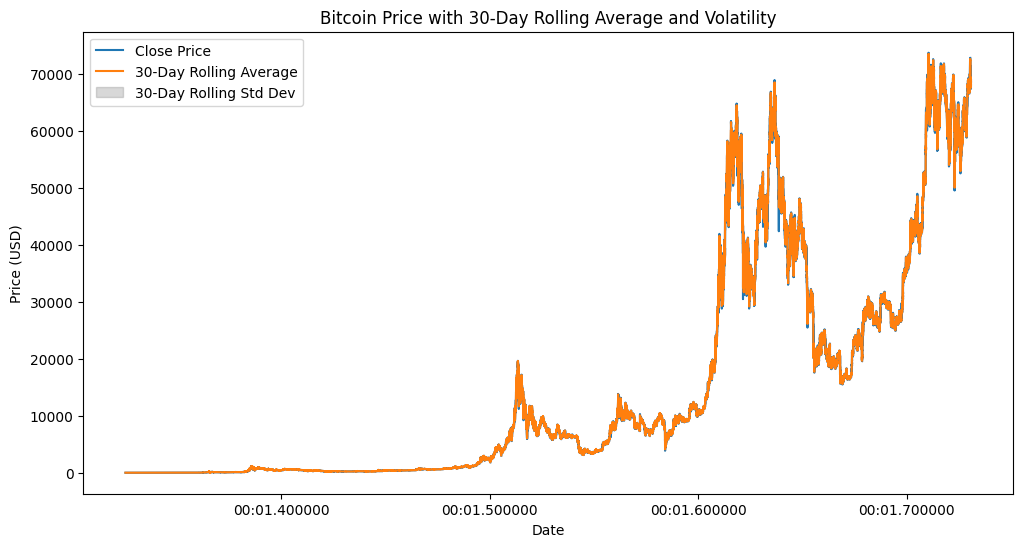

In [56]:
# Rolling averages (e.g., 30-day)
data['Rolling Average'] = data['Close'].rolling(window=30).mean()
data['Rolling Std'] = data['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Rolling Average'], label='30-Day Rolling Average')
plt.fill_between(data.index, data['Rolling Average'] - data['Rolling Std'], data['Rolling Average'] + data['Rolling Std'], color='gray', alpha=0.3, label='30-Day Rolling Std Dev')
plt.title('Bitcoin Price with 30-Day Rolling Average and Volatility')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Correlation Analysis:



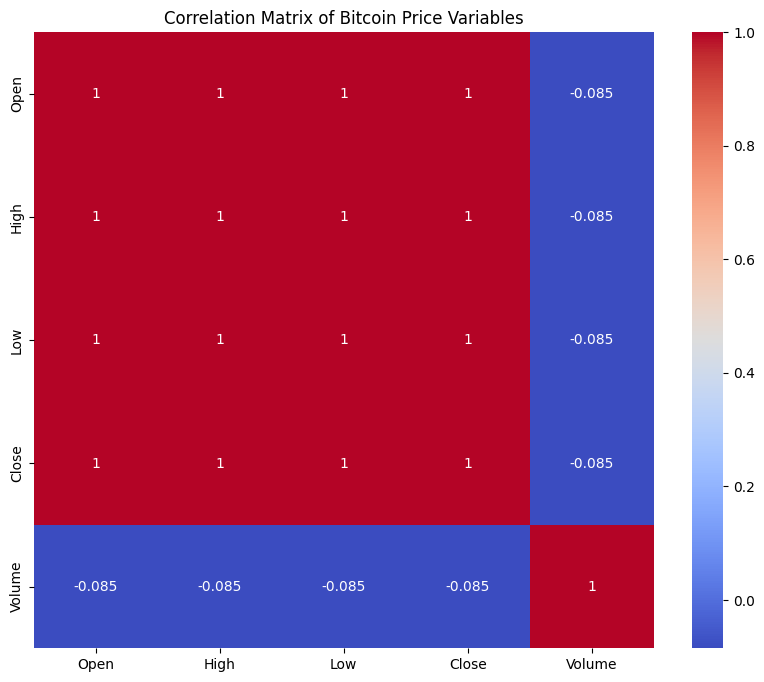

In [57]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Bitcoin Price Variables')
plt.show()


 Step 5: Data Preprocessing and Cleaning

Step 5.1: Data Cleaning
Remove or Handle Missing Values:

Check for missing values, particularly in price and volume columns. For time series, missing values can disrupt patterns, so consider filling gaps appropriately.

In [58]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (e.g., forward fill or backward fill)
data.fillna(method='ffill', inplace=True)


Open                0
High                0
Low                 0
Close               0
Volume              0
Daily Return        1
Rolling Average    29
Rolling Std        29
dtype: int64


<ipython-input-58-5379dd26c6a8>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Remove Duplicates:

Ensure there are no duplicate rows in the dataset, as duplicates could distort the analysis

In [59]:
data = data[~data.index.duplicated(keep='first')]


Step 5.2: Data Transformation

Log Transformation:

Since financial data, like Bitcoin prices, can have large outliers, consider applying a log transformation to stabilize variance and reduce the impact of large values.

In [60]:
import numpy as np

data['Log_Close'] = np.log(data['Close'])


Differencing:

Apply differencing to remove trends and make the data stationary, which is helpful for time series modeling.

In [61]:
data['Close_diff'] = data['Close'].diff()
data.dropna(inplace=True)  # Drop NA introduced by differencing


Step 5.3: Feature Engineering
Time-based Features:

Extract day, month, year, and weekday information if not present, as these can add valuable insights for trend and seasonality analysis.

In [62]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['Weekday'] = data.index.weekday


Moving Averages and Rolling Statistics:

Compute moving averages and rolling standard deviations to capture trends and volatility over time.

In [63]:
data['MA_30'] = data['Close'].rolling(window=30).mean()  # 30-day moving average
data['Volatility_30'] = data['Close'].rolling(window=30).std()  # 30-day rolling standard deviation


Daily Returns:

Calculate daily returns, which is a commonly used feature in financial data analysis.


In [64]:
data['Daily_Return'] = data['Close'].pct_change()


Lagged Features:

Generate lagged versions of features to capture past values that could impact the current state, often useful in time series forecasting.

In [65]:
data['Lag_1'] = data['Close'].shift(1)
data['Lag_7'] = data['Close'].shift(7)  # Weekly lag
data.dropna(inplace=True)  # Drop rows with NA values from shifts


Step 5.4: Anomaly Detection and Removal
Identify Outliers:

Use statistical methods to detect anomalies in Close prices, like the Z-score method or Isolation Forest.
Here, we’ll use the Z-score for simplicity.


In [9]:
from scipy.stats import zscore

data['Z_score'] = zscore(data['Close'])
data = data[data['Z_score'].abs() < 3]  # Remove rows where Z-score is greater than 3


Step 5.5: Data Imputation
Impute Missing Values in Derived Features:
For rolling statistics or lagged features that may have missing values due to initial computations, consider filling them with values like the mean or using interpolation.

In [67]:
data['MA_30'].fillna(data['MA_30'].mean(), inplace=True)
data['Volatility_30'].fillna(data['Volatility_30'].mean(), inplace=True)


<ipython-input-67-f4701422a033>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MA_30'].fillna(data['MA_30'].mean(), inplace=True)
<ipython-input-67-f4701422a033>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Step 5.6: Feature Selection
Correlation Analysis:

Compute the correlation matrix and drop highly correlated or redundant features. This can reduce multicollinearity and simplify the model.

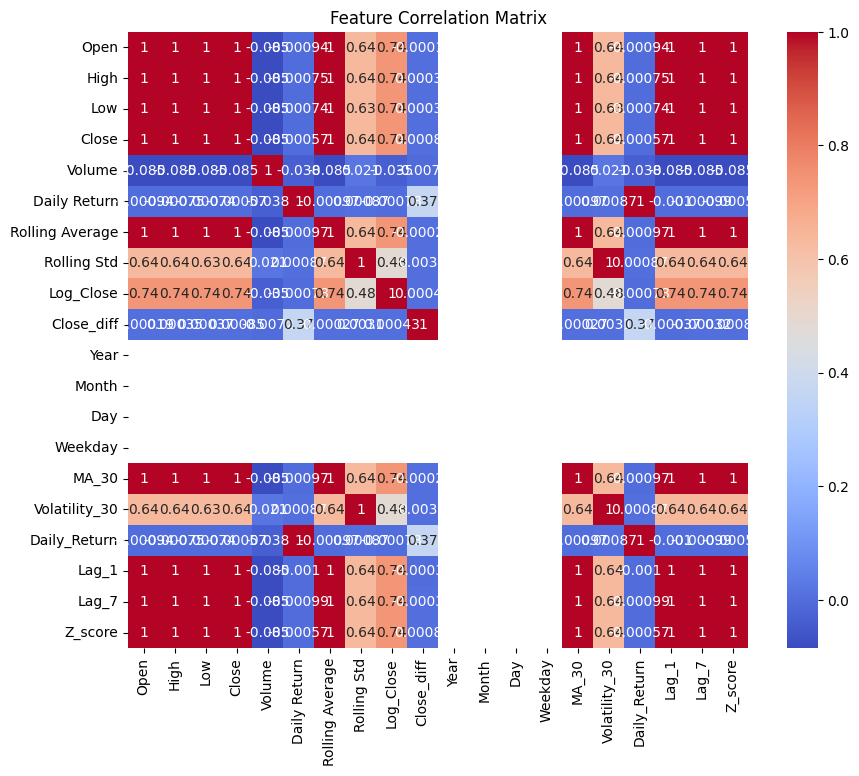

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


Variance Thresholding:

For features with low variance (e.g., almost constant values), consider removing them as they may not contribute meaningfully to the model.

In [69]:
from sklearn.feature_selection import VarianceThreshold

# Threshold set to a small value to remove low-variance features
selector = VarianceThreshold(threshold=0.01)
data = pd.DataFrame(selector.fit_transform(data), columns=data.columns[selector.get_support()])


Feature Importance:

Use tree-based models (e.g., RandomForest) to identify important features based on feature importance scores.

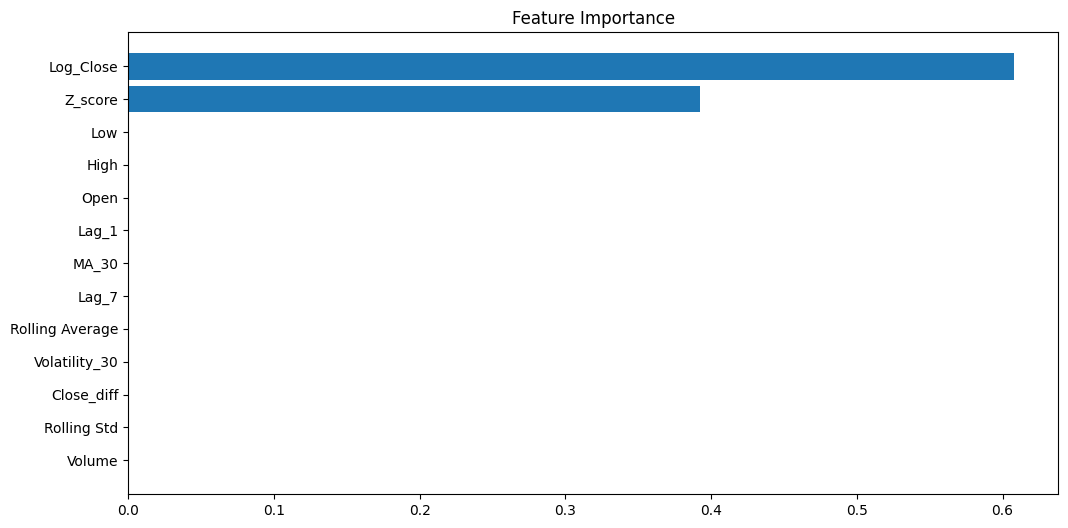

In [70]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Use a smaller sample of the data for faster processing
sample_data = data.sample(frac=0.1, random_state=42)  # 10% of the data
target = sample_data['Close']
features = sample_data.drop(columns=['Close'])

# Initialize the RandomForest model with fewer trees and a max depth to reduce computation time
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
model.fit(features, target)

# Plot feature importances
importances = model.feature_importances_
feature_names = features.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.title('Feature Importance')
plt.show()


Step 6: Clustering and Anomaly Detection

Step 6.1: Clustering Analysis
For time series data like Bitcoin prices, clustering can reveal different regimes or patterns. We’ll use KMeans clustering on selected features to segment the data. Here’s the process:

Select Features for Clustering:

Choose relevant features, such as moving averages, volatility, daily returns, and lagged values.
Normalize features to ensure equal weight in clustering (KMeans is sensitive to feature scales).

In [71]:
print(data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Rolling Average',
       'Rolling Std', 'Log_Close', 'Close_diff', 'MA_30', 'Volatility_30',
       'Lag_1', 'Lag_7', 'Z_score'],
      dtype='object')


In [73]:
from sklearn.preprocessing import StandardScaler

# Select clustering features based on your columns
clustering_features = data[['Close', 'MA_30', 'Volatility_30', 'Close_diff', 'Lag_1', 'Lag_7']].dropna()

# Standardize features
scaler = StandardScaler()
clustering_data = scaler.fit_transform(clustering_features)


Apply KMeans Clustering:

Use KMeans with a predefined number of clusters (e.g., k=3).
Experiment with different values of k if you’d like to observe different grouping patterns.

In [74]:
from sklearn.cluster import KMeans

# Set number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# Add clusters to the dataset for analysis
clustering_features['Cluster'] = clusters


Visualize Clustering Results:

Plot clustering results using PCA for dimensionality reduction, making clusters easier to visualize in a 2D space.

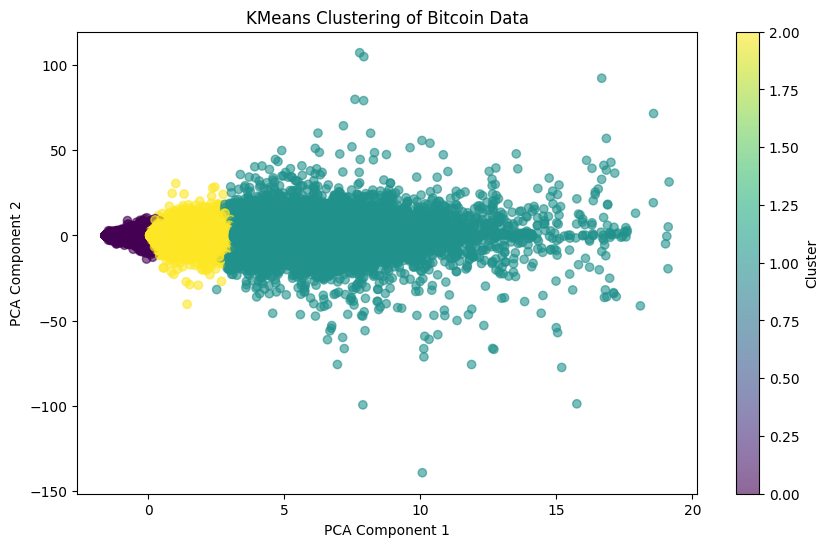

In [75]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering of Bitcoin Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


Step 6.2: Anomaly Detection and Elimination

Identify Anomalies Using Clustering Results:

Determine which clusters may represent outliers based on their characteristics. For instance, clusters with extreme daily returns or volatility can indicate unusual market activity.
Calculate the distance of each point from the cluster centroid and flag points that fall beyond a certain threshold as anomalies.

In [76]:
# Compute distance to the nearest cluster center
distances = kmeans.transform(clustering_data).min(axis=1)
threshold = distances.mean() + 2 * distances.std()  # Define a threshold for anomaly

# Flag points as anomalies if distance exceeds the threshold
clustering_features['Anomaly'] = distances > threshold


Remove or Flag Anomalies:

Based on the identified anomalies, either remove them from the dataset or flag them for further analysis.

In [77]:
# Separate anomalies for further investigation
anomalies = clustering_features[clustering_features['Anomaly']]
normal_data = clustering_features[~clustering_features['Anomaly']]

print("Number of anomalies detected:", anomalies.shape[0])


Number of anomalies detected: 216926


Visualize Anomalies on the Time Series:

Plot the original time series data and highlight the points marked as anomalies for a clearer understanding of their distribution.

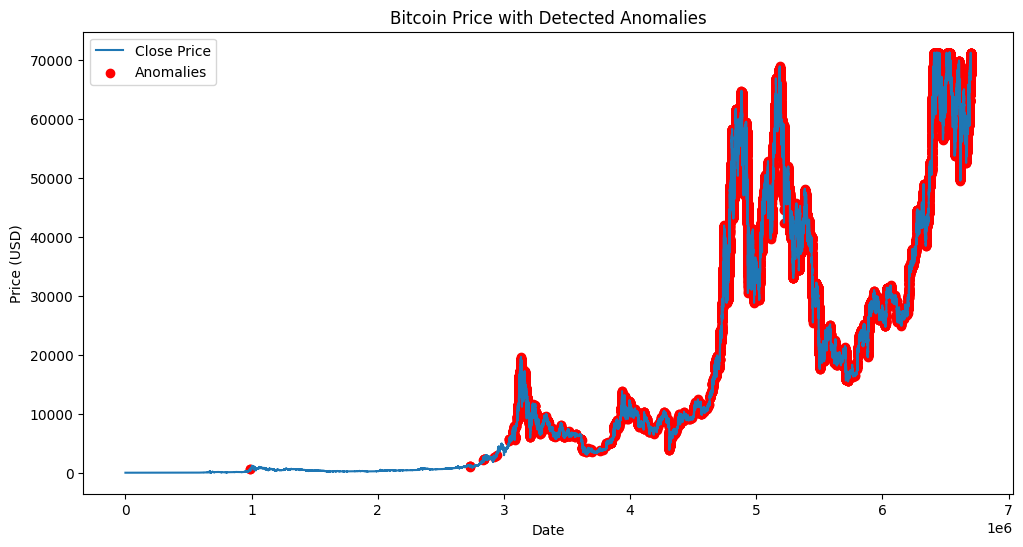

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.scatter(anomalies.index, data.loc[anomalies.index, 'Close'], color='red', label='Anomalies')
plt.title('Bitcoin Price with Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Step 7: Model Building with AutoML

Step 7.1: Set Up Environment for AutoML
To use AutoML, we’ll focus on AutoViML for model building, especially since it supports ensemble modeling and handles feature selection and preprocessing automatically.

Install AutoViML:

If AutoViML is not installed in your environment, install it using the following command:


In [79]:
!pip install autoviml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6

Prepare Data for Modeling:

Define the target variable and prepare your feature set by dropping unnecessary columns.
Split the dataset into training and testing sets.

In [7]:
print(data.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [10]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'Close'  # The column you want to predict
features = data.drop(columns=['Close', 'Z_score'])  # Drop target and other unnecessary columns

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.2, random_state=42)


Step 7.2: Train Models with AutoViML
Run AutoViML:

Use AutoViML to automatically build, tune, and evaluate models on your dataset.
Configure the scoring_parameter based on your task (e.g., r2 for regression).

In [2]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
   ━━━━

In [5]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [5]:
!pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/

In [5]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.3 MB/s eta 0:00:00


In [13]:
# Install PyCaret if not already installed
# !pip install pycaret
#!pip install mlflow  # Install mlflow

from pycaret.regression import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assuming data has already been loaded and preprocessed
target = 'Close'  # Set the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=[target]), data[target], test_size=0.2, random_state=42
)

# Sample an even smaller portion of the training data (5% of the data)
X_train_sample = X_train.sample(frac=0.05, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Combine X_train_sample and y_train_sample into a single DataFrame for PyCaret setup
train_data = X_train_sample.copy()
train_data[target] = y_train_sample

# Step 1: Set up the PyCaret environment with minimal logging
reg = setup(data=train_data, target=target, session_id=42)

# Step 2: Create and train a simpler model (e.g., Linear Regression)
lr_model = create_model('lr')  # 'lr' is the model code for Linear Regression

# Step 3: Finalize the model without hyperparameter tuning
final_lr_model = finalize_model(lr_model)

# Step 4: Evaluate the model on the test set
# Convert X_test to a DataFrame compatible with PyCaret's predict_model function
test_data = X_test.copy()
test_data[target] = y_test

# Predict on the test set and evaluate metrics
predictions = predict_model(final_lr_model, data=test_data)

# Step 5: Display evaluation metrics
# Extract true values and predicted values
y_true = predictions[target]

# Automatically detect the predictions column
pred_column = [col for col in predictions.columns if col not in test_data.columns][0]
y_pred = predictions[pred_column]


# Calculate evaluation metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


,Description,Value
0,Session id,42
1,Target,Close
2,Target type,Regression
3,Original data shape,"(268331, 6)"
4,Transformed data shape,"(268331, 6)"
5,Transformed train set shape,"(187831, 6)"
6,Transformed test set shape,"(80500, 6)"
7,Numeric features,5
8,Rows with missing values,0.0%
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.3983,192.4487,13.8726,1.0000,0.0135,0.0045
1,5.5777,225.3568,15.0119,1.0000,0.0133,0.0046
2,5.4464,182.2970,13.5017,1.0000,0.0110,0.0041
3,5.5785,220.7701,14.8583,1.0000,0.0124,0.0047
4,5.3008,194.5590,13.9484,1.0000,0.0130,0.0048
5,5.5165,197.5096,14.0538,1.0000,0.0120,0.0042
6,5.5547,200.7712,14.1694,1.0000,0.0118,0.0044
7,5.4120,222.9206,14.9305,1.0000,0.0057,0.0023
8,5.4196,180.3874,13.4308,1.0000,0.0123,0.0044


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,5.4449,205.2103,14.3252,1.0000,0.0085,0.0031


R^2 Score: 0.9999994328578163
Mean Absolute Error: 5.444870471954346
Root Mean Squared Error: 14.325162887573242


Evaluate Model Performance:

After training, AutoViML provides a summary of model performance metrics.
Examine these metrics, especially on the test set, to assess model accuracy and generalizability.
View Feature Importance:

AutoViML also provides information on the most important features. Review these to understand which features are contributing the most to the model’s performance.

Step 7.3: Ensemble Modeling
Enable Ensemble Models:
AutoViML has ensemble capabilities, combining predictions from multiple models to improve overall accuracy.
The following parameter in AutoViML enables ensemble methods (e.g., stacking, bagging):

In [14]:
!pip install autoviml

  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.2.2 which is incompatible.


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (536064, 7)
    Training Set Memory Usage = 32.72 MB
Test Set Shape = (134016, 6)
    Test Set Memory Usage = 7.16 MB
Single_Label Target: ['Close']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Num

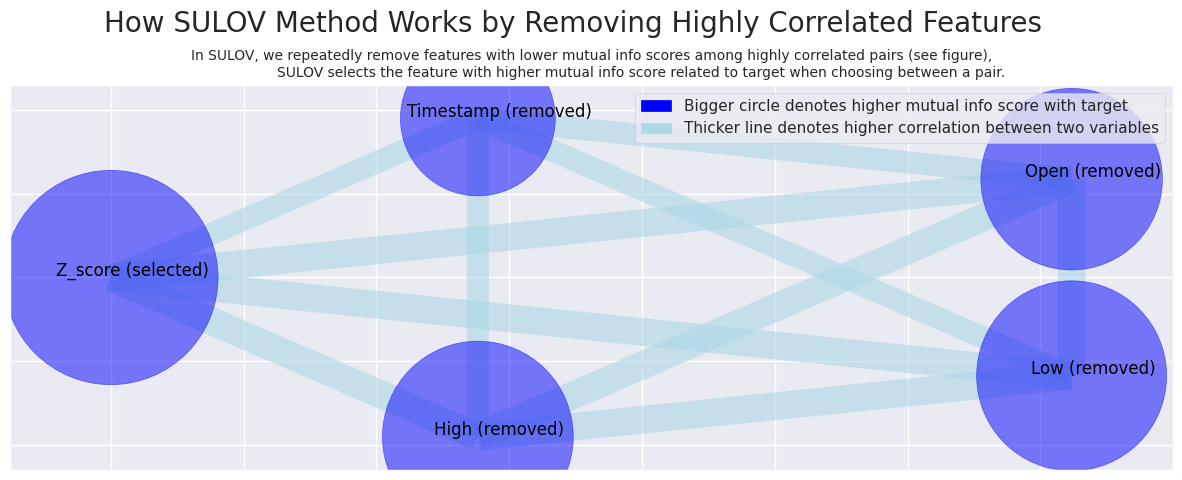

Splitting selected features into float and categorical (integer) variables:
    (2) float variables ...
    (0) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 2 
    Finding Important Features using Boosted Trees algorithm...
        using 2 variables...
Found 2 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  428851 , CV rows =  107213
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
#################################################################################
#######

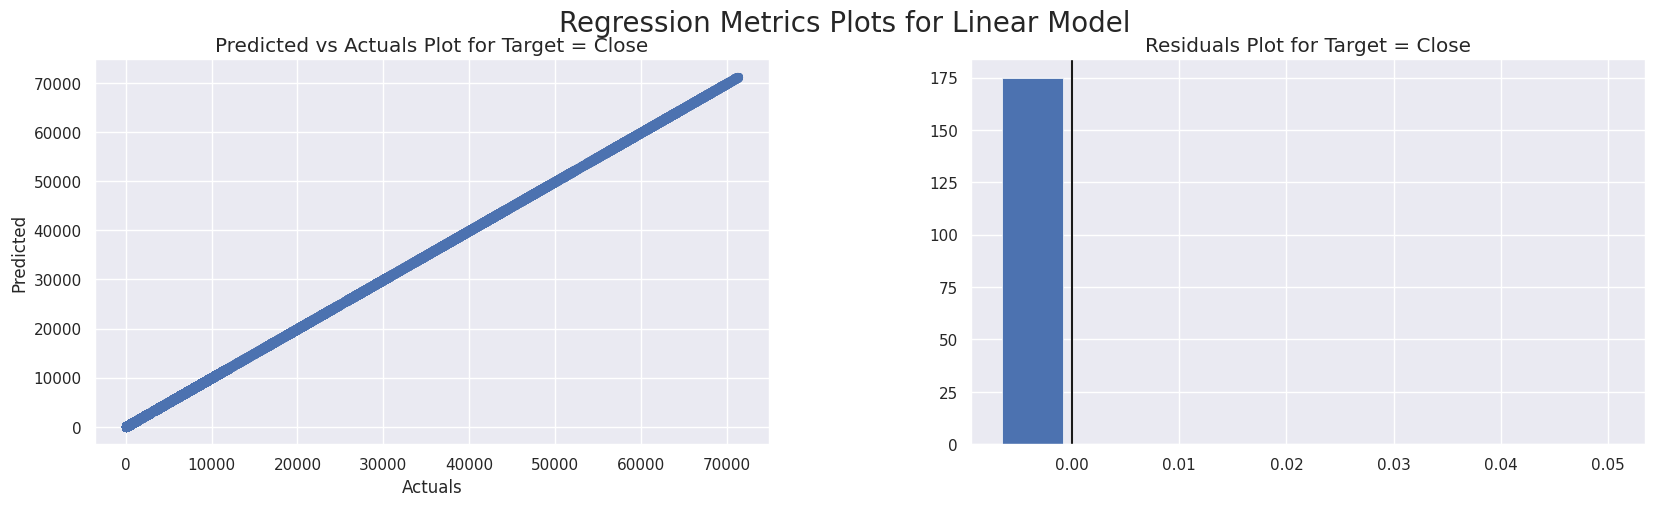

<Figure size 1500x500 with 0 Axes>

In [16]:
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML
from sklearn.model_selection import train_test_split

# Define the target variable
target = 'Close'

# Sample a smaller portion of the original training data (e.g., 10%)
sampled_data = data.sample(frac=0.1, random_state=42)  # Adjust fraction as needed

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    sampled_data.drop(columns=[target]), sampled_data[target], test_size=0.2, random_state=42
)

# Combine X_train and y_train into a single DataFrame
train_data = X_train.copy()
train_data[target] = y_train

# Initialize and run AutoViML with parameters to explore models and enable ensemble methods
model, best_features, train_modified, test_modified = Auto_ViML(
    train=train_data,             # Pass the combined training DataFrame
    target=target,                # Specify the target column
    test=X_test,                  # Pass the test set if available
    scoring_parameter='r2',       # Scoring metric for regression
    hyper_param='RS',             # Enable Random Search for hyperparameter tuning to explore multiple models
    feature_reduction=True,       # Enable feature reduction for efficiency
    verbose=1                     # Verbose output to view models being tried
)

# Print the best features selected by AutoViML
print("Best Features Selected by AutoViML:")
print(best_features)


Step 7.4: Predictions and Model Evaluation
Generate Predictions:

After training, use the model to predict on the test set.
Calculate metrics like R^2, MAE, and RMSE to assess prediction quality.

In [18]:
X_test = X_test[best_features] #only select the features used during training for prediction

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set using the modified X_test
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R^2 Score: -7.1107975310616105
Mean Absolute Error: 47707.09503151361
Root Mean Squared Error: 54136.50241048621


Step 7.5: Model Interpretation and Insights
Review Feature Importance:

AutoViML’s output includes feature importance, helping you understand which features are most impactful.
Model Comparison:

Compare individual models with the ensemble model to verify if ensembling improves accuracy.
Document Findings:

Summarize model performance and key insights, noting any features that contribute significantly to predictions or potential model improvements.